# Effect of Age on Trip Duration
## Abdulhamid Ibrahim

## Investigation Overview


<p>This presentation is to communicate the findings made from exploring the dataset of bike-sharing in the greater San Francisco Bay area. I want to look at trip duration and how it is affect by the Age of users, Wether the age of users can be used to predict the trip duration. </p>

## Dataset Overview

 
<p> This data set contains information rides by individuals made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019.
The data set has been stored as a pandas dataframe, It has 16 columns and 183412 rows. There are 3 main areas: </p>
    
1. Trip infotmation(Duration, Date, Bike ID, User_type)
2. Information about the station(Latitude and Longitude for End and Start Station) 
3. Information about the riders (Gender, Age)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
df_ride = pd.read_csv('df_ride.csv')

ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'hour': ['00', '01','02','03','04','05','06','07','08','09','10',
                             '11','12','13','14','15''16','17','18','19','20','21','22','23']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_ride[var] = df_ride[var].astype(ordered_var)


## Distribution Of Trip Duration In Minutes
The distribution of trip duration in minutes  on a log scale has its peak at approximately 7 and 12 minutes from the distribution we can see that trips that lasted from 6- 15 minutes are more in the data set. Most of the trip lasted between 1-30 minutes.

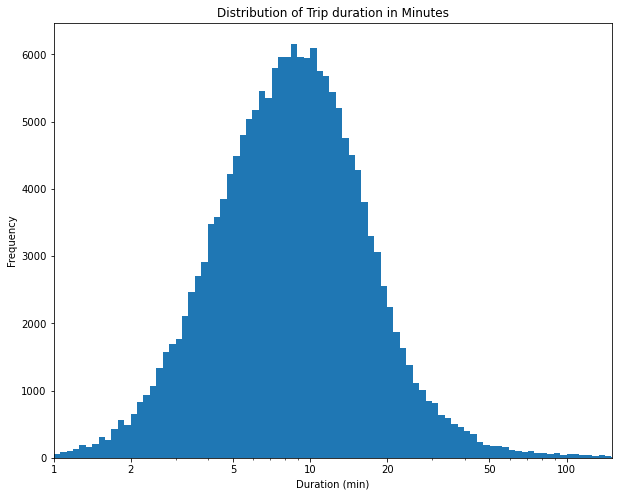

In [2]:
# load in the dataset into a pandas dataframe




plt.figure(figsize=[10, 8])
plt.hist(data = df_ride, x = 'duration_min', bins = 10**np.arange(0 , 4+0.025, 0.025))

plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100],[1,2,5,10,20,50,100])

plt.xlim(1,150)

plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip duration in Minutes') 

plt.show()





## Distribution Of Age In Minutes

<big> Age distribution is skewed to the right. It has a distribition of ages between 20 - 45 which is expected since some of the most active population in bike riding are usually youth between this age range.</big>

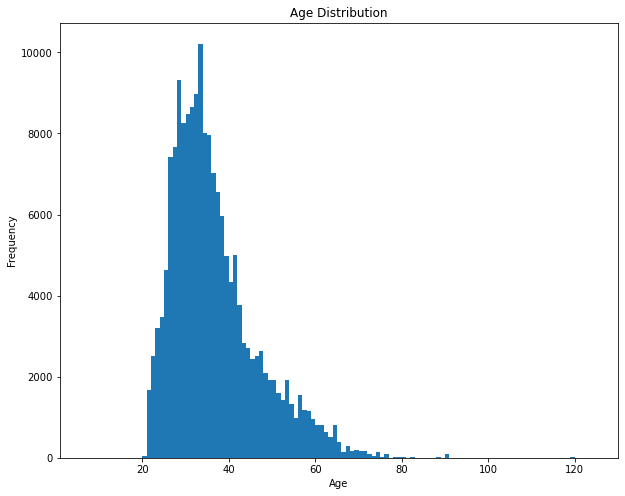

In [3]:
bins = np.arange(1, 121+1, 1)
plt.figure(figsize=[10,8])
plt.hist(data = df_ride, x = 'age', bins = bins)

plt.xlim(1,130)

plt.xlabel('Age')


plt.ylabel('Frequency')
plt.title('Age Distribution') 
plt.show()


## Trip Duration and Age By Selected Features of Interest

The relationship duration_min and age with the some selected categorical variables . The box plot elements show the median duration for weekdays is lower than for weekends.  There were more rides during the week days at the hours of 08:00 and 17:00 and average trip duration during the weekend is more than during the week. The  age distribution of subscriber and gender indicates the age of members are highly concentrated around the median.Subscribers usage seem to be very consistent and standard. Customers on the other hand tend to use bikes during the weekends.


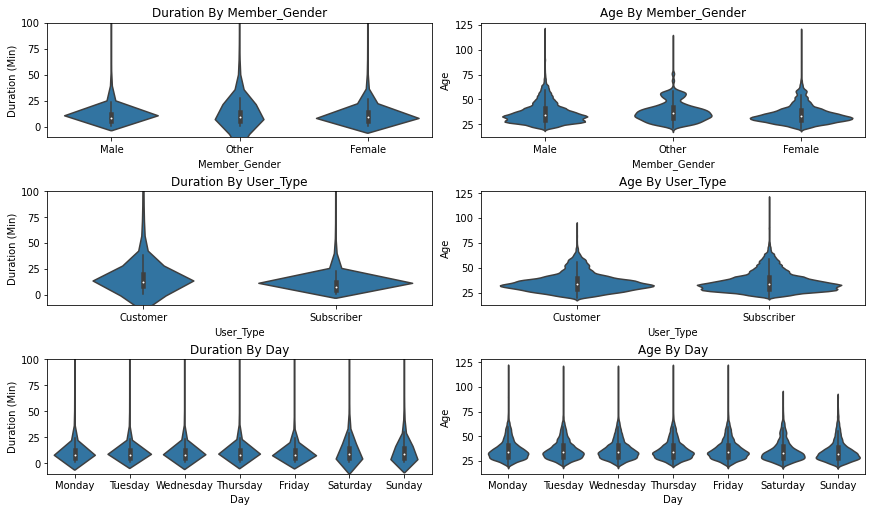

In [4]:

fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [12,7], constrained_layout = True)

colorn = sb.color_palette()[0]
cv = ['member_gender','user_type','day']
for i in range(len(cv)):
    var = cv[i]
    d = sb.violinplot(data = df_ride, x = var, y = 'duration_min', ax = ax[i,0],
                color = colorn)#inner=None
    d.set_ylim(-10, 100)
    

    d.set(xlabel =f'{var}'.title(), ylabel = f'Duration (min)'.title(),title =f'duration by {var}'.title())
     
    e = sb.violinplot(data = df_ride, x = var, y = 'age', ax = ax[i,1],color=colorn)

    e.set(xlabel =f'{var}'.title(), ylabel = f'Age'.title(),title =f'Age by {var}'.title())
    

plt.show()

##  Trip Duration vs Age

Before the exploring the dataset I was expecting Age to have a positve correlation with trip Duration but  from the result the age values are irrelevant to the Trip Duration which further comfirms that there is no correlation between Age and trip duration.


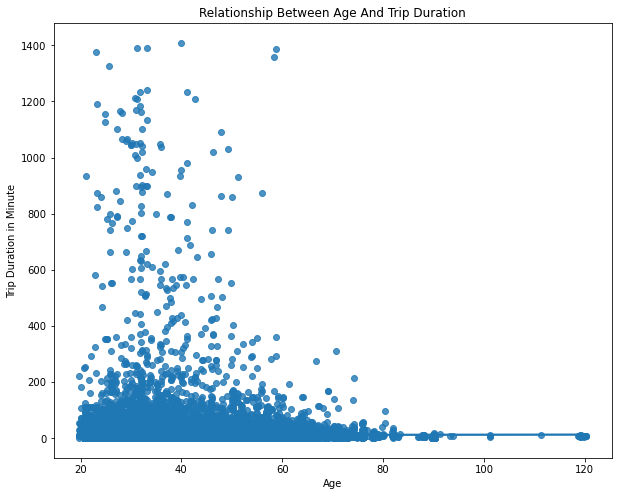

In [5]:
ax =  plt.figure(figsize=[10,8])
ax = sb.regplot(data = df_ride, x = 'age', y = 'duration_min', x_jitter=0.3);

ax.set(xlabel ='Age', ylabel = f'Trip Duration in Minute',title =f'Relationship between Age and Trip Duration'.title(),);# --SlidesExporter.reveal_scroll=True

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert communicate_result.ipynb --to slides --post serve --no-input --no-prompt